https://mp.weixin.qq.com/s?__biz=MzI1NTYzMTE4NA==&mid=2247483723&idx=1&sn=eee5814cb04c9ae6d089b8285cce1bd1&chksm=ea324b74dd45c2620c93ef5f0062c5e6a8bb486bbe47049f7aa7353d73e96705324b8fafe99a&mpshare=1&scene=1&srcid=1109vOSSyTDGUlOA4mhubAVZ&sharer_sharetime=1605007271520&sharer_shareid=76c7256f518be042b2c9b85c1b1ad471&key=dd1ecb7d7c9e7a36115a85c8292e3dc9334598e17b0acc91557d91431d111c8894623afa316811bb75e672b45fdea64699151327e4aa59f79fd4f5ffdaf5b2ae224f9df9362ae23cabf3918cb795975649f759782f2386e88d0095ab37df8b36213e3e9b9b520bd44dc334ccf0883c05421311ea0abc1c95003eb63bd4390e0b&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10+x64&version=6300002f&lang=zh_CN&exportkey=AcmYsgpD%2B1GlOaY15P7wnwE%3D&pass_ticket=aqPG2suLoh9YMlR0O7w%2FI36%2FbSUq%2BExFxWJfWTPwF%2FbQeYzaSLvWfNWd5KolBXoE&wx_header=0

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torchvision.utils import save_image

In [2]:
# 超参数定义
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 5
batch_size = 64
learning_rate = 1e-3

In [3]:
# 数据加载
root = '../dataset/'
train_dataset = torchvision.datasets.MNIST(root=root,train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root=root,train=False,transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

label is 0


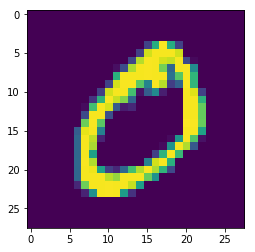

In [4]:
def show_img(data_tuple):
    img,label = data_tuple
    img = img.squeeze()
    plt.imshow(img)
    print(f"label is {label}")
show_img(train_dataset[1])

In [17]:
def squash(x):
    L = torch.norm(x,dim=2,keepdim=True)
    L_square = L**2
    c = (L_square)/(1 + L_square)/L
    s = c*x
    s[s == np.nan] = 0
    return s
x = torch.rand(1,10,16)
squash(x).shape

torch.Size([1, 10, 16])

In [ ]:
def dynamic_routing(x,iterations=3):
    N = 32*6*6
    N1 = 10
    B = x.shape[0]
    b = torch.zeros(B,N1,N,1,1).to(x.device)
    for _ in range(iterations):
        c = F.softmax(b,dim=1)
        